### Fitting data with formula
Gnuplot is capable to fit given data with functions given as formulas. This notebook contain several examples about how to fit data with GnuplotRB.

First lets prepare some data:

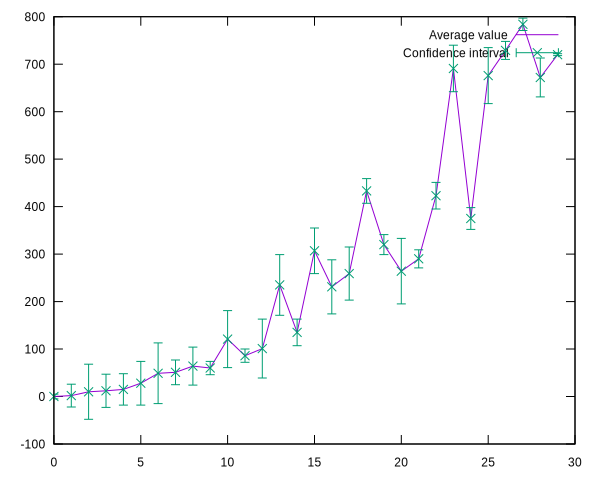

In [1]:
require 'daru'
require 'gnuplotrb'
include GnuplotRB

rows = (1..30).map do |i|
  [i**2 * (rand(4) + 3) / 5, rand(70)]
end
df = Daru::DataFrame.rows(rows, order: [:Value, :Error], name: 'Confidence interval')

random_points = Plot.new(
  [df[:Value], with: 'lines', title: 'Average value'],
  [df, with: 'err']
)

And now lets try to fit it with some function.

First parameter of #fit is *data* (you can use here Datablock, Dataset or any other object out of which Datablock may be constructed). Special options are *function* and *initials*, other options (such as *using*) may be found in gnuplot docs. Be careful: you should give initial value for each coefficient used in formula.

Return value is the following hash:
```
{
  :formula_ds => #<dataset with formula which fits given data>,
  :coefficients => #<hash of calculated coefficients>,
  :deltas => #<hash of possible deltas for coefficients>,
  :data => #<given data>
}
```

In [2]:
some_poly = fit(df, function: "a*x**3 + b*x + c", initials: {a: 1, b: 1, c: 1})
some_poly[:coefficients]

{:a=>0.0202176, :b=>11.6958, :c=>-25.679}

In [3]:
some_poly[:formula_ds].data

" 0.0202176*x**3 + 11.6958*x + -25.679 "

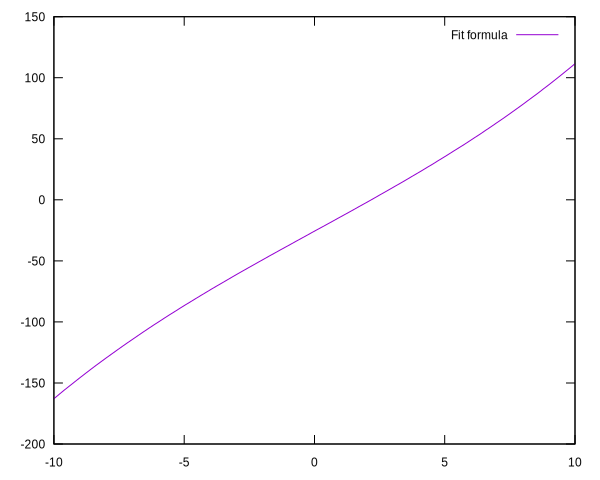

In [4]:
some_poly[:formula_ds]

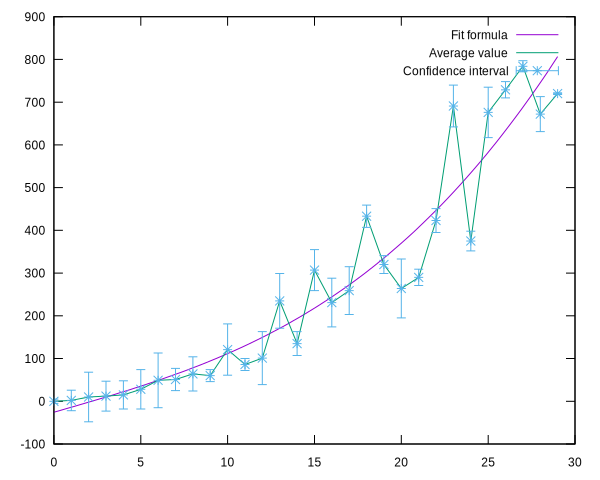

In [5]:
random_points << some_poly[:formula_ds]

You can find more information about how gnuplot's fitting work in [gnuplot doc](http://www.gnuplot.info/docs_5.0/gnuplot.pdf).

#### Default fittings
Polynomial:

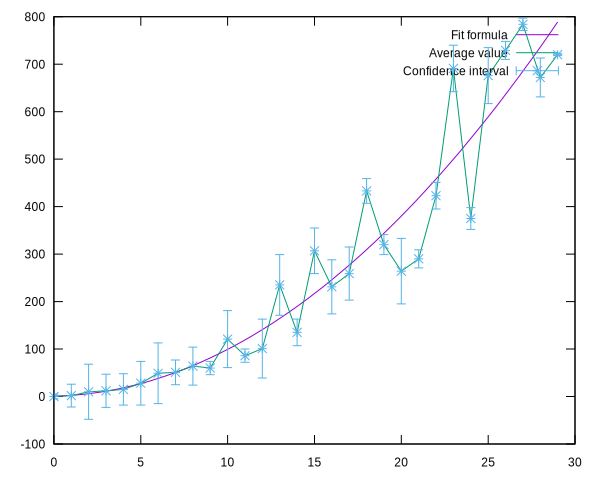

In [6]:
poly = fit_poly(df)
random_points.add_dataset(poly[:formula_ds])

Be default polynomial degree is 2 but you can set it:

In [7]:
frames = (2..9).map { |i| random_points.add_dataset(fit_poly(df, degree: i)[:formula_ds].options(title: "Fit (degree #{i})", lw: 2)) }
Animation.new(*frames, animate: { delay: 150 } )

#<GnuplotRB::Animation:0x000000036c05e0 @plots=Hamster::Vector[#<GnuplotRB::Plot:0x00000003a7e100 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000003a7e2b8 @type=:math_function, @data=" 0.815615*x**0 + 0.737658*x**1 + 0.911473*x**2 ", @options=Hamster::Hash[:title => "Fit (degree 2)", :lw => 2]>, #<GnuplotRB::Dataset:0x000000035fe170 @type=:datablock, @data=#<GnuplotRB::Datablock:0x000000035fe0a8 @stored_in_file=false, @data="0 0\n1 2\n2 10\n3 12\n4 15\n5 28\n6 49\n7 51\n8 64\n9 60\n10 121\n11 86\n12 101\n13 235\n14 135\n15 307\n16 231\n17 259\n18 433\n19 320\n20 264\n21 290\n22 423\n23 691\n24 375\n25 676\n26 729\n27 784\n28 672\n29 720\n">, @options=Hamster::Hash[:using => "1:2", :with => "lines", :title => "Average value"]>, #<GnuplotRB::Dataset:0x00000003603670 @type=:datablock, @data=#<GnuplotRB::Datablock:0x000000036034b8 @stored_in_file=false, @data="0 0 5\n1 2 24\n2 10 58\n3 12 35\n4 15 33\n5 28 46\n6 49 64\n7 51 26\n8 64 40\n9 60 14\n10 121 60\n11 86 14\n12 101 62\n13 235 64\n14 135 28\n15 307 48\n16 231 57\n17 259 56\n18 433 26\n19 320 21\n20 264 69\n21 290 19\n22 423 28\n23 691 49\n24 375 23\n25 676 59\n26 729 19\n27 784 13\n28 672 41\n29 720 2\n">, @options=Hamster::Hash[:using => "1:2:3", :with => "err", :title => :"Confidence interval"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x00000003301288 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000003301440 @type=:math_function, @data=" 5.29363*x**0 + -1.28935*x**1 + 1.08922*x**2 + -0.00408626*x**3 ", @options=Hamster::Hash[:title => "Fit (degree 3)", :lw => 2]>, #<GnuplotRB::Dataset:0x000000035fe170 @type=:datablock, @data=#<GnuplotRB::Datablock:0x000000035fe0a8 @stored_in_file=false, @data="0 0\n1 2\n2 10\n3 12\n4 15\n5 28\n6 49\n7 51\n8 64\n9 60\n10 121\n11 86\n12 101\n13 235\n14 135\n15 307\n16 231\n17 259\n18 433\n19 320\n20 264\n21 290\n22 423\n23 691\n24 375\n25 676\n26 729\n27 784\n28 672\n29 720\n">, @options=Hamster::Hash[:using => "1:2", :with => "lines", :title => "Average value"]>, #<GnuplotRB::Dataset:0x00000003603670 @type=:datablock, @data=#<GnuplotRB::Datablock:0x000000036034b8 @stored_in_file=false, @data="0 0 5\n1 2 24\n2 10 58\n3 12 35\n4 15 33\n5 28 46\n6 49 64\n7 51 26\n8 64 40\n9 60 14\n10 121 60\n11 86 14\n12 101 62\n13 235 64\n14 135 28\n15 307 48\n16 231 57\n17 259 56\n18 433 26\n19 320 21\n20 264 69\n21 290 19\n22 423 28\n23 691 49\n24 375 23\n25 676 59\n26 729 19\n27 784 13\n28 672 41\n29 720 2\n">, @options=Hamster::Hash[:using => "1:2:3", :with => "err", :title => :"Confidence interval"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x00000001ee0ce0 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000001ee0f60 @type=:math_function, @data=" -10.1938*x**0 + 11.3176*x**1 + -0.945026*x**2 + 0.106226*x**3 + -0.00190193*x**4 ", @options=Hamster::Hash[:title => "Fit (degree 4)", :lw => 2]>, #<GnuplotRB::Dataset:0x000000035fe170 @type=:datablock, @data=#<GnuplotRB::Datablock:0x000000035fe0a8 @stored_in_file=false, @data="0 0\n1 2\n2 10\n3 12\n4 15\n5 28\n6 49\n7 51\n8 64\n9 60\n10 121\n11 86\n12 101\n13 235\n14 135\n15 307\n16 231\n17 259\n18 433\n19 320\n20 264\n21 290\n22 423\n23 691\n24 375\n25 676\n26 729\n27 784\n28 672\n29 720\n">, @options=Hamster::Hash[:using => "1:2", :with => "lines", :title => "Average value"]>, #<GnuplotRB::Dataset:0x00000003603670 @type=:datablock, @data=#<GnuplotRB::Datablock:0x000000036034b8 @stored_in_file=false, @data="0 0 5\n1 2 24\n2 10 58\n3 12 35\n4 15 33\n5 28 46\n6 49 64\n7 51 26\n8 64 40\n9 60 14\n10 121 60\n11 86 14\n12 101 62\n13 235 64\n14 135 28\n15 307 48\n16 231 57\n17 259 56\n18 433 26\n19 320 21\n20 264 69\n21 290 19\n22 423 28\n23 691 49\n24 375 23\n25 676 59\n26 729 19\n27 784 13\n28 672 41\n29 720 2\n">, @options=Hamster::Hash[:using => "1:2:3", :with => "err", :title => :"Confidence interval"]>], @cmd="plot ">, #<GnuplotRB::Plot:0x000000037d5d18 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x0

You can also fit data with *exp*, *sin* and *log* like this:

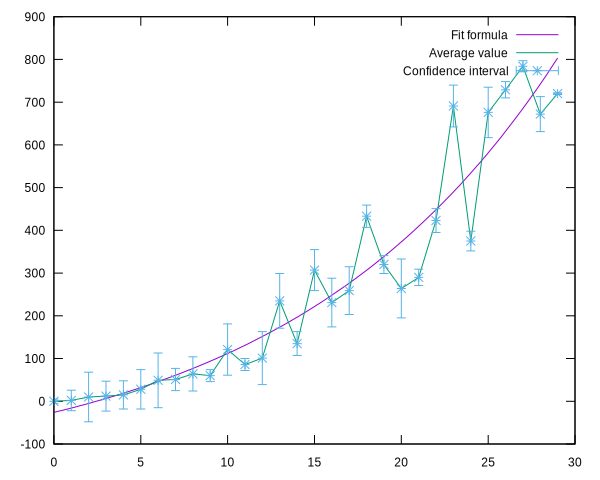

In [8]:
exp = fit_exp(df)
random_points.add_dataset(exp[:formula_ds])

And set ranges for fitting:

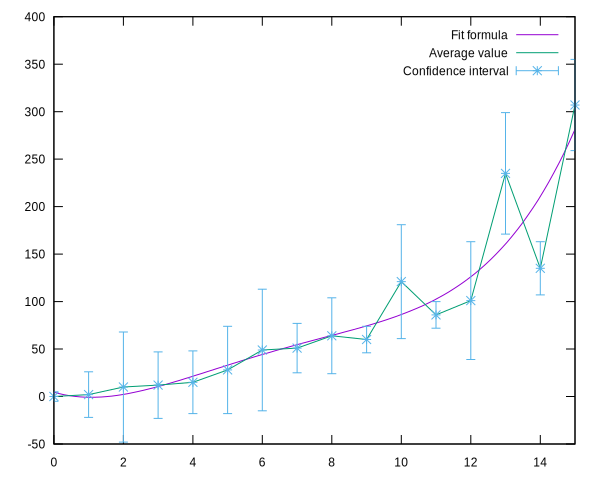

In [9]:
ranged_poly = fit_poly(df, degree: 4, term_options: { xrange: 0..15})
random_points.add_dataset(ranged_poly[:formula_ds]).xrange(0..15)